In [1]:
import re

import pandas as pd
import seaborn as sns

In [2]:
string = """
PH
76 Kerusi



PN
51 Kerusi



BN
30 Kerusi



PAS
22 Kerusi



GPS
22 Kerusi



GRS
6 Kerusi



DAP
5 Kerusi



WARISAN
3 Kerusi



BEBAS
2 Kerusi



MUDA
1 Kerusi



KDM
1 Kerusi



PBM
1 Kerusi
"""
string = string.strip()
strings = re.split("\n\n", string)
strings = [
    string.replace(" Kerusi", "").split("\n")
    for string in strings
    if string != ""
]

df = pd.DataFrame(strings, columns=["Party", "Seats"])
df.Seats = df.Seats.astype("int")
df.loc[len(df)] = ["(unknown)", 222 - df.Seats.sum()]

df

,Party,Seats
0,PH,76
1,PN,51
2,BN,30
3,PAS,22
4,GPS,22
5,GRS,6
6,DAP,5
7,WARISAN,3
8,BEBAS,2
9,MUDA,1


In [3]:
party_mapping = [
    ("DAP", "PH"), ("MUDA", "PH"), ("PAS", "PN")
]

for party1, party2 in party_mapping:
    seats = df.loc[df.Party == party1, "Seats"].iloc[0]
    df.loc[df.Party == party2, "Seats"] += seats
    df.drop(df[df.Party == party1].index, inplace=True)

df.loc[df.Party == "PH", "Party"] = "PH + MUDA"
df.sort_values("Seats", ascending=False, inplace=True)

df

,Party,Seats
0,PH + MUDA,82
1,PN,73
2,BN,30
4,GPS,22
5,GRS,6
7,WARISAN,3
8,BEBAS,2
12,(unknown),2
10,KDM,1
11,PBM,1


[Text(0, 0, '82'),
 Text(0, 0, '73'),
 Text(0, 0, '30'),
 Text(0, 0, '22'),
 Text(0, 0, '6'),
 Text(0, 0, '3'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '1'),
 Text(0, 0, '1')]

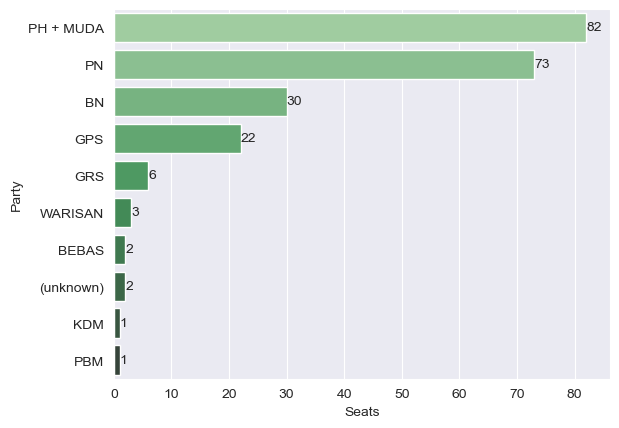

In [4]:
palette = sns.color_palette("Greens_d", len(df))
x, y = "Seats", "Party"
plot = sns.barplot(df, x=x, y=y, palette=palette)
plot.bar_label(plot.containers[0])